In [1]:
import os
import pandas
import numpy as np
import torch
import matplotlib.pyplot as plt
import hcpdatautils as hcp
import isingutils as ising

In [2]:
int_type = torch.int
float_type = torch.float
device = torch.device('cuda')

In [3]:
data_dir = 'E:\\HCP_data'
model_dir = 'E:\\Ising_model_results_daai'
stats_dir = 'E:\\Ising_model_results_batch'

In [5]:
ml_model_string = 'epochs_500_val_batch_100_steps_4800_lr_0.0001_batches_1000_node_hl_2_node_w_21_edge_hl_2_edge_w_441'
ising_model_string = 'nodes_21_reps_100_epochs_1000_window_50_lr_0.001_threshold_0.100'
combined_string = f'struct2ising_{ml_model_string}_ising_{ising_model_string}'
# training data results
h_loss_file = os.path.join(model_dir, f'h_loss_{combined_string}.pt')
h_loss = torch.load(h_loss_file)
print( 'h loss training size', h_loss.size() )
J_loss_file = os.path.join(model_dir, f'J_loss_{combined_string}.pt')
J_loss = torch.load(J_loss_file)
print( 'J loss training size', J_loss.size() )
fc_corr_file = os.path.join(model_dir, f'fc_corr_{combined_string}.pt')
fc_corr = torch.load(fc_corr_file)
print( 'FC corr training size', fc_corr.size() )
fc_rmse_file = os.path.join(model_dir, f'fc_rmse_{combined_string}.pt')
fc_rmse = torch.load(fc_rmse_file)
print( 'FC RMSE training size', fc_rmse.size() )
# validation data results
h_loss_val_file = os.path.join(model_dir, f'h_loss_val_{combined_string}.pt')
h_loss_val = torch.load(h_loss_val_file)
print( 'h loss validation size', h_loss.size() )
J_loss_val_file = os.path.join(model_dir, f'J_loss_val_{combined_string}.pt')
J_loss_val = torch.load(J_loss_val_file)
print( 'J loss validation size', J_loss_val.size() )
fc_corr_val_file = os.path.join(model_dir, f'fc_corr_val_{combined_string}.pt')
fc_corr_val = torch.load(fc_corr_val_file)
print( 'FC corr validation size', fc_corr_val.size() )
fc_rmse_val_file = os.path.join(model_dir, f'fc_rmse_val_{combined_string}.pt')
fc_rmse_val = torch.load(fc_rmse_val_file)
print( 'FC RMSE validation size', fc_rmse_val.size() )

h loss training size torch.Size([669, 100, 21])
J loss training size torch.Size([669, 100, 21, 21])
FC corr training size torch.Size([669, 100])
FC RMSE training size torch.Size([669, 100])
h loss validation size torch.Size([669, 100, 21])
J loss validation size torch.Size([83, 100, 21, 21])
FC corr validation size torch.Size([83, 100])
FC RMSE validation size torch.Size([83, 100])


In [16]:
def make_bar_plot(name:str, context_string:str, values: torch.Tensor):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    axs.hist( values.flatten().detach().cpu().numpy() )
    # axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
    axs.set_xlabel(name)
    axs.set_ylabel('count in bin')
    axs.set_title(f'distribution of {name} {context_string}')
    plt.show()

In [29]:
def print_stats(name:str, context_string:str, values:torch.Tensor):
    quantile_cutoffs = torch.tensor([0.025, 0.5, 0.975], dtype=float_type, device=device)
    quantiles = torch.quantile(values, quantile_cutoffs)
    min_val = torch.min(values)
    max_val = torch.max(values)
    print(f'The distribution of {name} {context_string} has median {quantiles[1].item():.3g} with 95% CI [{quantiles[0].item():.3g}, {quantiles[2].item():.3g}] and range [{min_val.item():.3g}, {max_val.item():.3g}].')

In [30]:
context_string = 'for struct-to-Ising model with training data'
context_string_val = 'for struct-to-Ising model with validation data'

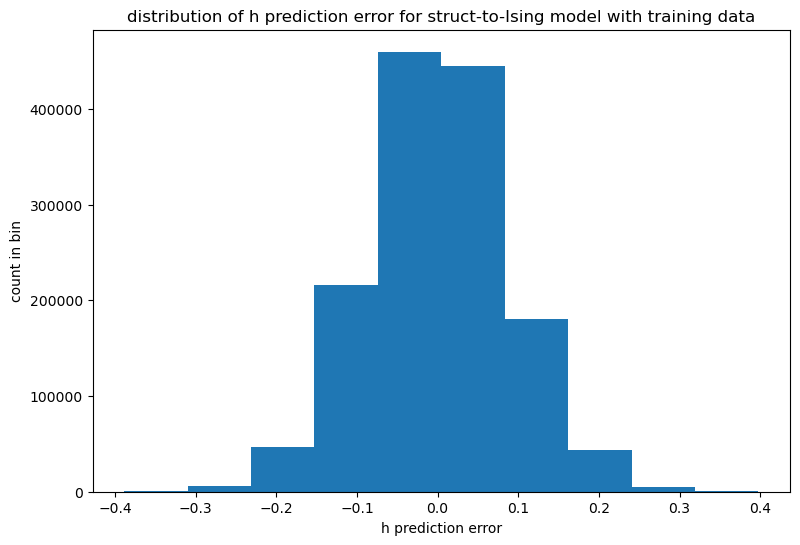

The distribution of h prediction error for struct-to-Ising model with training data has median 0.000418 with 95% CI [-0.17, 0.178] and range [-0.389, 0.398].


In [31]:
var_name = 'h prediction error'
make_bar_plot(var_name, context_string, h_loss)
print_stats(var_name, context_string, h_loss)

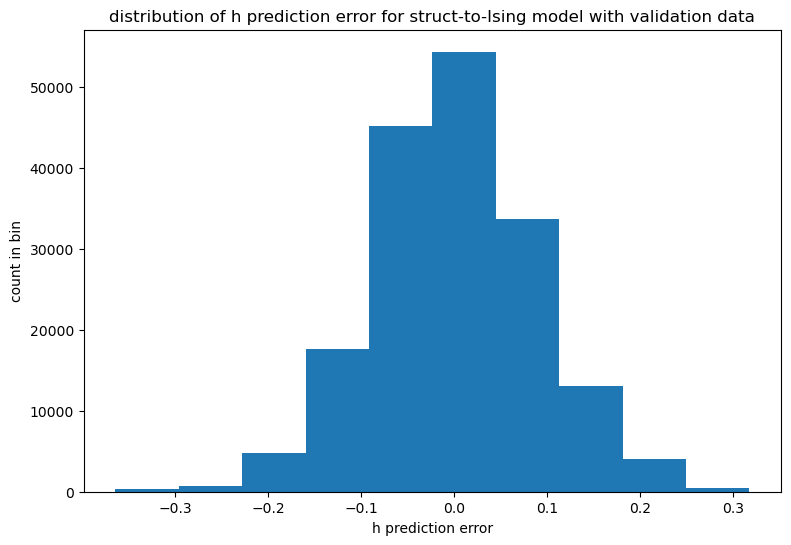

The distribution of h prediction error for struct-to-Ising model with validation data has median 3.18e-05 with 95% CI [-0.172, 0.183] and range [-0.364, 0.317].


In [32]:
var_name = 'h prediction error'
make_bar_plot(var_name, context_string_val, h_loss_val)
print_stats(var_name, context_string_val, h_loss_val)

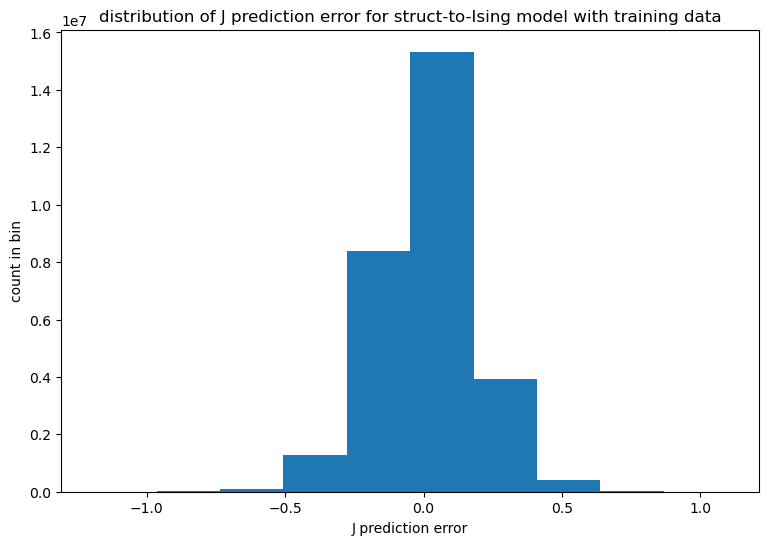

RuntimeError: quantile() input tensor is too large

In [33]:
var_name = 'J prediction error'
make_bar_plot(var_name, context_string, J_loss)
print_stats(var_name, context_string, J_loss)

In [34]:
J_loss_min = torch.min(J_loss)
J_loss_median = torch.median(J_loss)
J_loss_max = torch.max(J_loss)
J_loss_std, J_loss_mean = torch.std_mean(J_loss)
print('J prediction error for training data:')
print(f'min: {J_loss_min:.3g}')
print(f'median: {J_loss_median:.3g}')
print(f'max: {J_loss_max:.3g}')
print(f'mean: {J_loss_mean:.3g}')
print(f'std. dev.: {J_loss_std:.3g}')

J prediction error for training data:
min: -1.19
median: 0.0148
max: 1.1
mean: 0.013
std. dev.: 0.172


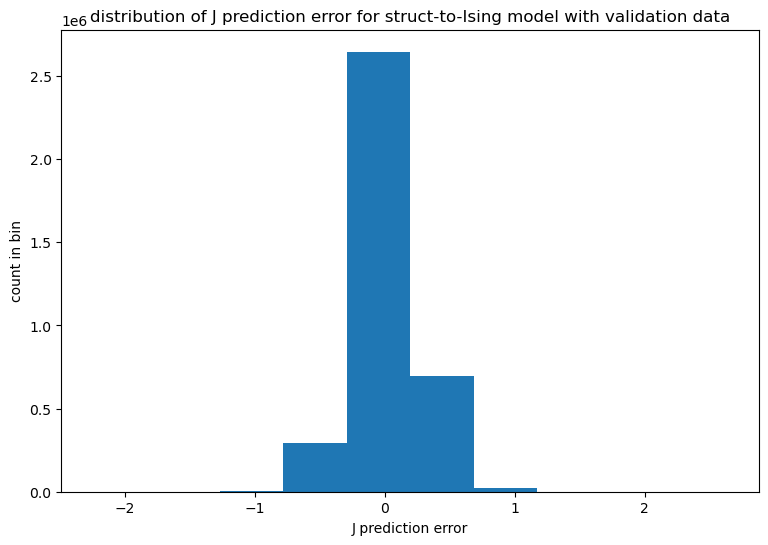

The distribution of J prediction error for struct-to-Ising model with validation data has median 0.0137 with 95% CI [-0.45, 0.478] and range [-2.25, 2.63].


In [35]:
var_name = 'J prediction error'
make_bar_plot(var_name, context_string_val, J_loss_val)
print_stats(var_name, context_string_val, J_loss_val)

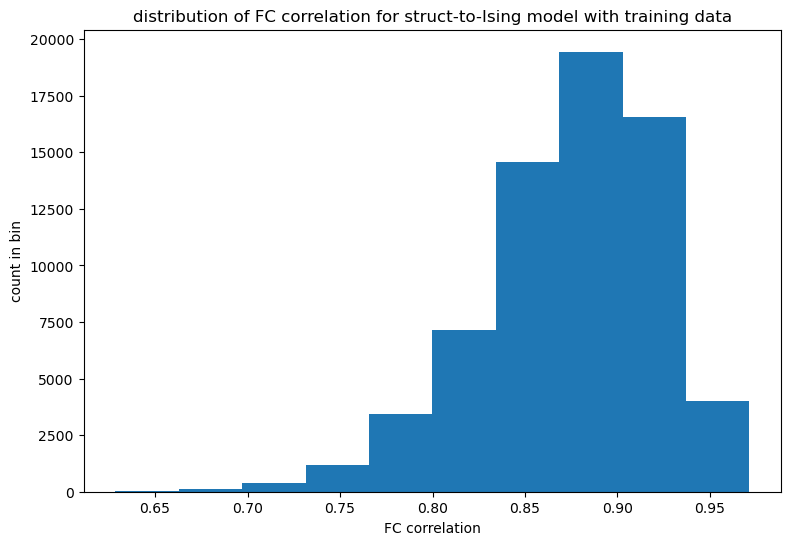

The distribution of FC correlation for struct-to-Ising model with training data has median 0.881 with 95% CI [0.764, 0.948] and range [0.629, 0.971].


In [36]:
var_name = 'FC correlation'
make_bar_plot(var_name, context_string, fc_corr)
print_stats(var_name, context_string, fc_corr)

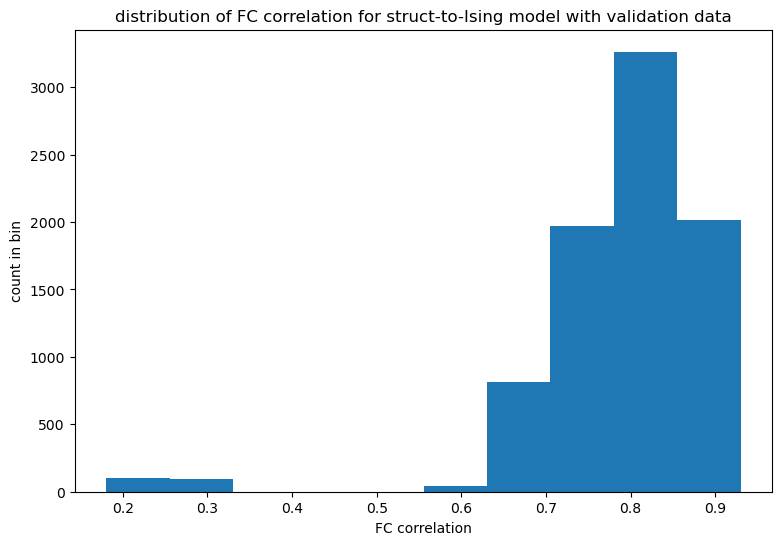

The distribution of FC correlation for struct-to-Ising model with validation data has median 0.803 with 95% CI [0.619, 0.903] and range [0.181, 0.93].


In [37]:
var_name = 'FC correlation'
make_bar_plot(var_name, context_string_val, fc_corr_val)
print_stats(var_name, context_string_val, fc_corr_val)

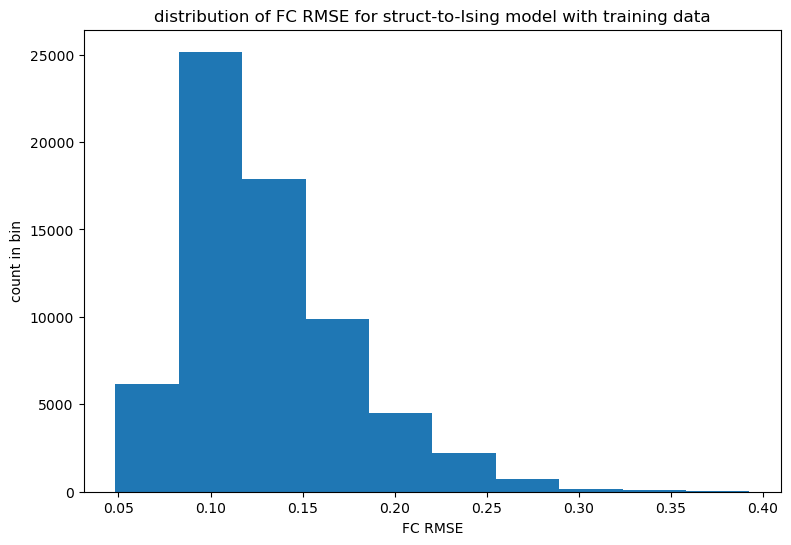

The distribution of FC RMSE for struct-to-Ising model with training data has median 0.121 with 95% CI [0.0708, 0.243] and range [0.0483, 0.393].


In [38]:
var_name = 'FC RMSE'
make_bar_plot(var_name, context_string, fc_rmse)
print_stats(var_name, context_string, fc_rmse)

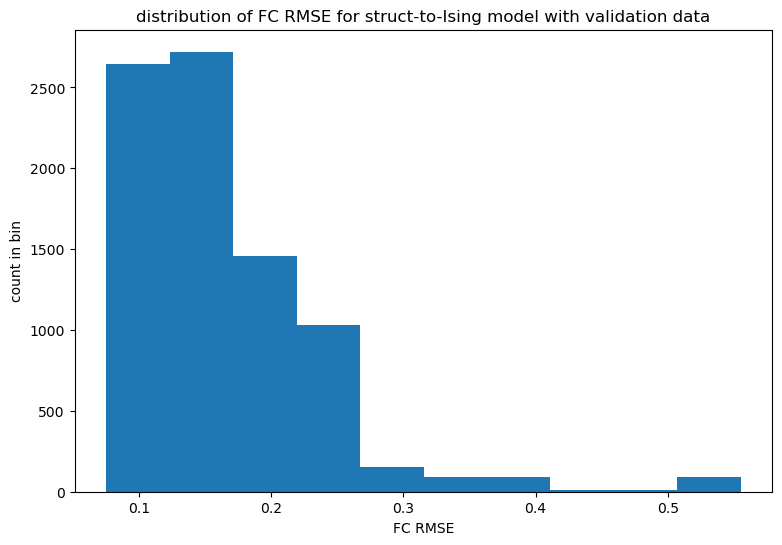

The distribution of FC RMSE for struct-to-Ising model with validation data has median 0.144 with 95% CI [0.0854, 0.348] and range [0.0755, 0.555].


In [39]:
var_name = 'FC RMSE'
make_bar_plot(var_name, context_string_val, fc_rmse_val)
print_stats(var_name, context_string_val, fc_rmse_val)

In [43]:
class Struct2Param(torch.nn.Module):

    # helper function for initialization => Do not call this elsewhere.
    def get_hidden_layer(self, n:int):
        index = n//2
        if n % 2 == 0:
            return ( f'hidden_linear{index}', torch.nn.Linear(in_features=self.hidden_layer_width, out_features=self.hidden_layer_width, device=device, dtype=float_type) )
        else:
            return ( f'hidden_relu{index}', torch.nn.ReLU() )

    # previously worked well with 21-node model:
    # def __init__(self, num_features:int, rep_dims:int=15, hidden_layer_width_1:int=15, hidden_layer_width_2:int=15, dtype=float_type, device=device)
    def __init__(self, num_features:int, num_hidden_layer:int=1, hidden_layer_width:int=90, dtype=float_type, device=device):
        super(Struct2Param, self).__init__()
        self.num_features = num_features
        self.num_hidden_layer = num_hidden_layer
        self.hidden_layer_width = hidden_layer_width
        layer_list = [
            ( 'input_linear', torch.nn.Linear(in_features=self.num_features, out_features=self.hidden_layer_width, dtype=dtype, device=device) ),
            ( 'input_relu', torch.nn.ReLU() )
            ] + [
            self.get_hidden_layer(n) for n in range(2*self.num_hidden_layer)
            ] + [
            ( 'output_linear', torch.nn.Linear(in_features=self.hidden_layer_width, out_features=1, dtype=dtype, device=device) )
            ]
        layer_dict = OrderedDict(layer_list)
        self.ff_layers = torch.nn.Sequential(layer_dict)
    
    def forward(self, features):
        return self.ff_layers(features).squeeze()

In [45]:
node_model_file = os.path.join(model_dir, f'node_model_{combined_string}')
node_model = torch.load(node_model_file)
print( 'node model', node_model )
edge_model_file = os.path.join(model_dir, f'edge_model_{combined_string}')
edge_model = torch.load(edge_model_file)
print( 'edge model', edge_model )

node model Struct2Param(
  (ff_layers): Sequential(
    (input_linear): Linear(in_features=7, out_features=21, bias=True)
    (input_relu): ReLU()
    (hidden_linear0): Linear(in_features=21, out_features=21, bias=True)
    (hidden_relu0): ReLU()
    (hidden_linear1): Linear(in_features=21, out_features=21, bias=True)
    (hidden_relu1): ReLU()
    (output_linear): Linear(in_features=21, out_features=1, bias=True)
  )
)
edge model Struct2Param(
  (ff_layers): Sequential(
    (input_linear): Linear(in_features=15, out_features=441, bias=True)
    (input_relu): ReLU()
    (hidden_linear0): Linear(in_features=441, out_features=441, bias=True)
    (hidden_relu0): ReLU()
    (hidden_linear1): Linear(in_features=441, out_features=441, bias=True)
    (hidden_relu1): ReLU()
    (output_linear): Linear(in_features=441, out_features=1, bias=True)
  )
)


In [57]:
test_input = torch.tensor([100000.0, 2.0, -1.0, 3.0, -0.0001, -5.0, 0.00000001], dtype=float_type, device=device)
print(test_input)
print( len(node_model.ff_layers) )
# for layer in node_model.ff_layers:
#     test_input = layer(test_input)
#     print(test_input)

tensor([ 1.0000e+05,  2.0000e+00, -1.0000e+00,  3.0000e+00, -1.0000e-04,
        -5.0000e+00,  1.0000e-08], device='cuda:0')
7


In [62]:
# Assume we are dealing with sequential linear layers with ReLU layers sandwitched between them.
def find_partial_derivative_of_model(model:torch.nn.Module, x:torch.Tensor, param_index:int):
    pdx_over_pdx_i = torch.zeros_like(x)
    pdx_over_pdx_i[param_index] = 1.0
    num_layers = len(model.ff_layers)
    for linear_index in range(0, num_layers-2, 2):
        relu_index = linear_index+1
        x = model.ff_layers[relu_index]( model.ff_layers[linear_index](x) )
        # zero out the derivatives based on the result of the ReLU for the actual input.
        pdx_over_pdx_i = model.ff_layers[linear_index](pdx_over_pdx_i) * x.sign()
        print( x, pdx_over_pdx_i )
    x = model.ff_layers[-1](x)
    pdx_over_pdx_i = model.ff_layers[-1](pdx_over_pdx_i)
    print( x, pdx_over_pdx_i )
    return x, pdx_over_pdx_i

In [63]:
test_input = torch.randn( (7,), dtype=float_type, device=device )
print(test_input)
test_output, test_pderiv = find_partial_derivative_of_model(model=node_model, x=test_input, param_index=0)
print(test_output, test_pderiv)

tensor([-3.0815,  0.8228,  2.0474,  2.6871,  1.9776, -0.8600, -1.0847],
       device='cuda:0')
tensor([0.0000, 4.4268, 1.5326, 1.2576, 0.0000, 0.0000, 1.6607, 0.9815, 0.0000,
        7.6589, 3.4083, 0.0000, 4.0549, 0.0000, 3.2614, 0.0000, 0.0000, 3.6881,
        0.0000, 0.3755, 0.0000], device='cuda:0', grad_fn=<ReluBackward0>) tensor([-0.0000,  0.3982, -0.4037, -0.0115, -0.0000,  0.0000,  0.2899, -0.2341,
        -0.0000,  0.7498,  0.6639, -0.0000, -0.2018, -0.0000,  0.0371, -0.0000,
        -0.0000, -0.2210,  0.0000, -0.1005, -0.0000], device='cuda:0',
       grad_fn=<MulBackward0>)
tensor([1.8580, 0.0000, 0.0000, 0.0617, 1.9322, 0.0000, 1.6648, 0.4760, 0.3940,
        0.0000, 0.0000, 1.0602, 1.5508, 2.0816, 1.6101, 2.2020, 0.0000, 2.1068,
        0.1478, 0.0000, 0.1313], device='cuda:0', grad_fn=<ReluBackward0>) tensor([ 0.3955,  0.0000, -0.0000,  0.3069, -0.0902, -0.0000, -0.2067, -0.1330,
         0.2827, -0.0000,  0.0000,  0.0474, -0.1583,  0.2002,  0.2494,  0.0108,
         0.0

In [64]:
# Assume we are dealing with sequential linear layers with ReLU layers sandwitched between them.
def find_partial_derivatives_of_model(model:torch.nn.Module, x:torch.Tensor):
    num_inputs = x.size(dim=-1)
    pdx_over_pdx_i = torch.eye( n=num_inputs, dtype=x.dtype, device=x.device )
    num_layers = len(model.ff_layers)
    for linear_index in range(0, num_layers-2, 2):
        relu_index = linear_index+1
        x = model.ff_layers[relu_index]( model.ff_layers[linear_index](x) )
        # zero out the derivatives based on the result of the ReLU for the actual input.
        pdx_over_pdx_i = model.ff_layers[linear_index](pdx_over_pdx_i) * x.sign()
        print( x, pdx_over_pdx_i )
    x = model.ff_layers[-1](x)
    pdx_over_pdx_i = model.ff_layers[-1](pdx_over_pdx_i)
    print( x, pdx_over_pdx_i )
    return x, pdx_over_pdx_i

In [66]:
test_input = torch.randn( (7,), dtype=float_type, device=device )
print(test_input)
test_output, test_pderiv = find_partial_derivatives_of_model(model=node_model, x=test_input)
print(test_output, test_pderiv)

tensor([ 0.0514, -0.3733, -0.4215, -0.6889,  0.3024,  0.3761,  1.3797],
       device='cuda:0')
tensor([0.4211, 0.0000, 0.0000, 0.0000, 0.4026, 0.4835, 0.0000, 0.0000, 1.5033,
        0.0000, 0.0000, 0.0000, 0.0000, 1.4026, 0.0422, 0.0000, 1.7777, 0.0000,
        1.3536, 0.3049, 1.0108], device='cuda:0', grad_fn=<ReluBackward0>) tensor([[-0.2556,  0.0000, -0.0000, -0.0000, -0.5703,  0.2638,  0.0000, -0.0000,
         -0.1308,  0.0000,  0.0000, -0.0000, -0.0000, -0.5055,  0.0371, -0.0000,
         -0.5231, -0.0000,  0.5735, -0.1005, -0.2807],
        [-1.3199,  0.0000, -0.0000,  0.0000, -0.5955,  0.1519,  0.0000,  0.0000,
         -1.0076,  0.0000,  0.0000,  0.0000,  0.0000,  0.2436,  0.1288, -0.0000,
         -1.5397,  0.0000, -0.3554, -0.1155, -0.3290],
        [-1.1624,  0.0000, -0.0000,  0.0000, -0.4169,  0.0323,  0.0000,  0.0000,
         -3.4646,  0.0000,  0.0000, -0.0000,  0.0000, -4.0315,  0.6718, -0.0000,
         -2.1218,  0.0000, -0.9786, -0.2469, -1.5384],
        [-0.1100, 

In [151]:
# Assume we are dealing with sequential linear layers with ReLU layers sandwitched between them.
def find_partial_derivatives_of_model_batched(model:torch.nn.Module, x:torch.Tensor):
    x_dims = x.size()
    num_x_dims = len(x_dims)
    num_inputs = x_dims[-1]
    pdx_over_pdx_i = torch.eye( n=num_inputs, dtype=x.dtype, device=x.device )
    if num_x_dims > 1:
        reshape_shape = torch.Size([1] * (num_x_dims-1) + [num_inputs, num_inputs])
        repeat_shape = x_dims[:-1] + torch.Size( (1, 1) )
        pdx_over_pdx_i = torch.reshape(pdx_over_pdx_i, reshape_shape).repeat(repeat_shape)
        x = x.unsqueeze(dim=-2)
    num_layers = len(model.ff_layers)
    for linear_index in range(0, num_layers-2, 2):
        relu_index = linear_index+1
        x = model.ff_layers[relu_index]( model.ff_layers[linear_index](x) )
        # zero out the derivatives based on the result of the ReLU for the actual input.
        pdx_over_pdx_i = ( model.ff_layers[linear_index](pdx_over_pdx_i) - model.ff_layers[linear_index].bias ) * x.sign()
        print( x.size(), pdx_over_pdx_i.size() )
    x = model.ff_layers[-1](x)
    pdx_over_pdx_i = model.ff_layers[-1](pdx_over_pdx_i) - model.ff_layers[-1].bias
    print( x.size(), pdx_over_pdx_i.size() )
    return x.squeeze(), pdx_over_pdx_i.squeeze()

In [152]:
batched_test_input = torch.randn( (3,5,7), dtype=float_type, device=device )
batched_test_output, batched_test_partial_derivatives = find_partial_derivatives_of_model_batched(model=node_model, x=batched_test_input)
print( batched_test_output.size() )
print(batched_test_output)
print( batched_test_partial_derivatives.size() )
print(batched_test_partial_derivatives)

torch.Size([3, 5, 1, 21]) torch.Size([3, 5, 7, 21])
torch.Size([3, 5, 1, 21]) torch.Size([3, 5, 7, 21])
torch.Size([3, 5, 1, 21]) torch.Size([3, 5, 7, 21])
torch.Size([3, 5, 1, 1]) torch.Size([3, 5, 7, 1])
torch.Size([3, 5])
tensor([[ 0.1343, -0.0081,  0.0545, -0.1019,  0.2515],
        [ 0.0407, -0.0195, -0.0115, -0.0353, -0.1250],
        [ 0.1554, -0.1080, -0.0298,  0.0469, -0.0519]], device='cuda:0',
       grad_fn=<SqueezeBackward0>)
torch.Size([3, 5, 7])
tensor([[[ 3.0497e-02, -6.5742e-02,  2.7608e-02,  9.2749e-02, -4.6920e-03,
          -1.6542e-02,  3.2941e-02],
         [-5.0496e-04,  2.4077e-02,  5.9780e-02,  1.0696e-02,  3.1988e-03,
           5.5361e-03,  5.3777e-03],
         [ 3.5497e-02,  8.2633e-03,  1.0583e-01,  1.0107e-01,  1.1720e-02,
           2.9889e-03,  1.5821e-02],
         [-1.5971e-02, -1.2828e-02,  6.2535e-02, -1.2737e-02, -1.2746e-02,
          -3.4566e-02, -4.9011e-03],
         [ 5.3003e-03,  2.2647e-02,  1.6532e-01, -2.9409e-02,  1.3995e-02,
          -8

In [89]:
batched_test_input = torch.randn( (7,), dtype=float_type, device=device )
batched_test_output, batched_test_partial_derivatives = find_partial_derivatives_of_model_batched(model=node_model, x=batched_test_input)
print( batched_test_output.size() )
print(batched_test_output)
print( batched_test_partial_derivatives.size() )
print(batched_test_partial_derivatives)

torch.Size([21]) torch.Size([7, 21])
torch.Size([21]) torch.Size([7, 21])
torch.Size([21]) torch.Size([7, 21])
torch.Size([1]) torch.Size([7, 1])
torch.Size([])
tensor(0.0983, device='cuda:0', grad_fn=<SqueezeBackward0>)
torch.Size([7])
tensor([ 0.0014, -0.1427, -0.0371,  0.0243, -0.0130, -0.0149,  0.0012],
       device='cuda:0', grad_fn=<SqueezeBackward0>)


In [98]:
class Struct2ParamTester(torch.nn.Module):

    # previously worked well with 21-node model:
    # def __init__(self, num_features:int, rep_dims:int=15, hidden_layer_width_1:int=15, hidden_layer_width_2:int=15, dtype=float_type, device=device)
    def __init__(self, model:torch.nn.Module, input_values:torch.Tensor):
        super(Struct2ParamTester, self).__init__()
        self.model = model
        self.input_values = torch.nn.Parameter(input_values)
    
    def forward(self):
        output_values = self.model(self.input_values)
        return output_values
    
    def get_input_gradients(self):
        return self.input_values.grad

In [99]:
test_input = torch.randn( (7,), dtype=float_type, device=device )
print(test_input)
node_model_tester = Struct2ParamTester(model=node_model, input_values=test_input)
test_output = node_model_tester()
print(test_output)
test_output.backward()
test_grad = node_model_tester.get_input_gradients()
print( test_grad )

tensor([-0.0296, -1.0605, -0.7805,  0.9565,  1.4837,  0.9429, -0.5766],
       device='cuda:0')
tensor(-0.0975, device='cuda:0', grad_fn=<SqueezeBackward0>)
tensor([-0.0268, -0.0225,  0.0514, -0.0101, -0.0029, -0.0308, -0.0245],
       device='cuda:0')


In [155]:
test_input = torch.randn( (7,), dtype=float_type, device=device )
print('input', test_input)
node_model_tester = Struct2ParamTester(model=node_model, input_values=test_input)
test_grad_module = node_model_tester.get_input_gradients()
print('gradients from tester module before forward()', test_grad_module )
test_output_module = node_model_tester()
print('output from tester module', test_output_module)
test_output_module.backward()
test_grad_module = node_model_tester.get_input_gradients()
print('gradients from tester module', test_grad_module )
test_output_function, test_grad_function = find_partial_derivatives_of_model_batched(model=node_model, x=test_input)
print('output from forward-and-derivative function', test_output_function)
print('gradients from forward-and-derivative function', test_grad_function)

input tensor([-0.8801, -0.9263,  0.4067, -0.5737,  1.6723, -0.9674, -1.8106],
       device='cuda:0')
gradients from tester module before forward() None
output from tester module tensor(0.0458, device='cuda:0', grad_fn=<SqueezeBackward0>)
gradients from tester module tensor([ 0.0191, -0.0460,  0.0786,  0.0123, -0.0110, -0.0138,  0.0152],
       device='cuda:0')
torch.Size([21]) torch.Size([7, 21])
torch.Size([21]) torch.Size([7, 21])
torch.Size([21]) torch.Size([7, 21])
torch.Size([1]) torch.Size([7, 1])
output from forward-and-derivative function tensor(0.0458, device='cuda:0', grad_fn=<SqueezeBackward0>)
gradients from forward-and-derivative function tensor([ 0.0191, -0.0460,  0.0786,  0.0123, -0.0110, -0.0138,  0.0152],
       device='cuda:0', grad_fn=<SqueezeBackward0>)


In [101]:
class DotModel(torch.nn.Module):

    # previously worked well with 21-node model:
    # def __init__(self, num_features:int, rep_dims:int=15, hidden_layer_width_1:int=15, hidden_layer_width_2:int=15, dtype=float_type, device=device)
    def __init__(self):
        super(DotModel, self).__init__()
    
    def forward(self, x:torch.Tensor):
        return torch.dot(  torch.arange( x.size(dim=-1), dtype=x.dtype, device=x.device ), x  )

In [102]:
test_input = torch.tensor( [13.0, 17.0, 19.0, 23.0, 29.0], dtype=float_type, device=device )
dot_model = DotModel()
print(test_input)
dot_model_tester = Struct2ParamTester(model=dot_model, input_values=test_input)
test_output = dot_model_tester()
print(test_output)
test_output.backward()
test_grad = dot_model_tester.get_input_gradients()
print( test_grad )

tensor([13., 17., 19., 23., 29.], device='cuda:0')
tensor(240., device='cuda:0', grad_fn=<DotBackward0>)
tensor([0., 1., 2., 3., 4.], device='cuda:0')


In [110]:
class FixedLinearModel(torch.nn.Module):

    # previously worked well with 21-node model:
    # def __init__(self, num_features:int, rep_dims:int=15, hidden_layer_width_1:int=15, hidden_layer_width_2:int=15, dtype=float_type, device=device)
    def __init__(self,num_features:int=5):
        super(FixedLinearModel, self).__init__()
        self.linear = torch.nn.Linear(in_features=num_features, out_features=1, dtype=float_type, device=device)
        with torch.no_grad():
            self.linear.weight.copy_( torch.arange(num_features, dtype=float_type, device=device) )
            self.linear.bias.copy_( torch.tensor([-1.0], dtype=float_type, device=device) )
    
    def forward(self, x:torch.Tensor):
        return self.linear(x)

In [111]:
test_input = torch.tensor( [13.0, 17.0, 19.0, 23.0, 29.0], dtype=float_type, device=device )
linear_model = FixedLinearModel( num_features=test_input.numel() )
print(test_input)
linear_model_tester = Struct2ParamTester(model=linear_model, input_values=test_input)
test_output = linear_model_tester()
print(test_output)
test_output.backward()
test_grad = linear_model_tester.get_input_gradients()
print( test_grad )

tensor([13., 17., 19., 23., 29.], device='cuda:0')
tensor([239.], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0., 1., 2., 3., 4.], device='cuda:0')


In [128]:
class FixedDoubleLinearModel(torch.nn.Module):

    # previously worked well with 21-node model:
    # def __init__(self, num_features:int, rep_dims:int=15, hidden_layer_width_1:int=15, hidden_layer_width_2:int=15, dtype=float_type, device=device)
    def __init__(self,num_features:int=5, num_hidden_nodes:int=4):
        super(FixedDoubleLinearModel, self).__init__()
        self.linear1 = torch.nn.Linear(in_features=num_features, out_features=num_hidden_nodes, dtype=float_type, device=device)
        self.linear2 = torch.nn.Linear(in_features=num_hidden_nodes, out_features=1, dtype=float_type, device=device)
        with torch.no_grad():
            num_weights = num_features * num_hidden_nodes
            A = torch.arange(num_weights, dtype=float_type, device=device).reshape((num_features, num_hidden_nodes)).transpose(dim0=0, dim1=1)
            print('A', A)
            self.linear1.weight.copy_(A)
            b = torch.arange(start=num_weights, end=num_weights+num_hidden_nodes, dtype=float_type, device=device)
            print('b', b)
            self.linear1.bias.copy_(b)
            c = torch.arange(start=num_weights+num_hidden_nodes, end=num_weights+2*num_hidden_nodes, dtype=float_type, device=device)
            print('c', c)
            self.linear2.weight.copy_(c)
            d = torch.tensor([num_weights+2*num_hidden_nodes], dtype=float_type, device=device)
            print('d', d)
            self.linear2.bias.copy_(d)
        self.seq = torch.nn.Sequential( self.linear1, self.linear2 )
    
    def forward(self, x:torch.Tensor):
        # print('x', x)
        # y = self.linear1(x)
        # print('y', y)
        # z = self.linear2(y)
        # print('z', z)
        return self.seq(x)

In [129]:
test_input = torch.tensor( [13.0, 17.0, 19.0, 23.0, 29.0], dtype=float_type, device=device )
linear_model = FixedDoubleLinearModel( num_features=test_input.numel() )
print(test_input)
linear_model_tester = Struct2ParamTester(model=linear_model, input_values=test_input)
test_output = linear_model_tester()
print(test_output)
test_output.backward()
test_grad = linear_model_tester.get_input_gradients()
print( test_grad )

A tensor([[ 0.,  4.,  8., 12., 16.],
        [ 1.,  5.,  9., 13., 17.],
        [ 2.,  6., 10., 14., 18.],
        [ 3.,  7., 11., 15., 19.]], device='cuda:0')
b tensor([20., 21., 22., 23.], device='cuda:0')
c tensor([24., 25., 26., 27.], device='cuda:0')
d tensor([28.], device='cuda:0')
tensor([13., 17., 19., 23., 29.], device='cuda:0')
tensor([116104.], device='cuda:0', grad_fn=<AddBackward0>)
tensor([ 158.,  566.,  974., 1382., 1790.], device='cuda:0')


In [133]:
class FixedMLP(torch.nn.Module):

    # previously worked well with 21-node model:
    # def __init__(self, num_features:int, rep_dims:int=15, hidden_layer_width_1:int=15, hidden_layer_width_2:int=15, dtype=float_type, device=device)
    def __init__(self,num_features:int=5, num_hidden_nodes:int=4):
        super(FixedMLP, self).__init__()
        self.linear1 = torch.nn.Linear(in_features=num_features, out_features=num_hidden_nodes, dtype=float_type, device=device)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(in_features=num_hidden_nodes, out_features=1, dtype=float_type, device=device)
        with torch.no_grad():
            num_weights = num_features * num_hidden_nodes
            A = torch.arange(num_weights, dtype=float_type, device=device).reshape((num_features, num_hidden_nodes)).transpose(dim0=0, dim1=1)
            print('A', A)
            self.linear1.weight.copy_(A)
            b = torch.arange(start=num_weights, end=num_weights+num_hidden_nodes, dtype=float_type, device=device)
            print('b', b)
            self.linear1.bias.copy_(b)
            c = torch.arange(start=num_weights+num_hidden_nodes, end=num_weights+2*num_hidden_nodes, dtype=float_type, device=device)
            print('c', c)
            self.linear2.weight.copy_(c)
            d = torch.tensor([num_weights+2*num_hidden_nodes], dtype=float_type, device=device)
            print('d', d)
            self.linear2.bias.copy_(d)
        self.seq = torch.nn.Sequential( self.linear1, self.relu, self.linear2 )
    
    def forward(self, x:torch.Tensor):
        # print('x', x)
        # y = self.linear1(x)
        # print('y', y)
        # z = self.linear2(y)
        # print('z', z)
        return self.seq(x)

In [131]:
test_input = torch.tensor( [13.0, 17.0, 19.0, 23.0, 29.0], dtype=float_type, device=device )
mlp_model = FixedMLP( num_features=test_input.numel() )
print(test_input)
mlp_model_tester = Struct2ParamTester(model=mlp_model, input_values=test_input)
test_output = mlp_model_tester()
print(test_output)
test_output.backward()
test_grad = mlp_model_tester.get_input_gradients()
print( test_grad )

A tensor([[ 0.,  4.,  8., 12., 16.],
        [ 1.,  5.,  9., 13., 17.],
        [ 2.,  6., 10., 14., 18.],
        [ 3.,  7., 11., 15., 19.]], device='cuda:0')
b tensor([20., 21., 22., 23.], device='cuda:0')
c tensor([24., 25., 26., 27.], device='cuda:0')
d tensor([28.], device='cuda:0')
tensor([13., 17., 19., 23., 29.], device='cuda:0')
tensor([116104.], device='cuda:0', grad_fn=<AddBackward0>)
tensor([ 158.,  566.,  974., 1382., 1790.], device='cuda:0')


In [132]:
test_input = torch.tensor( [-29.0, -23.0, 19.0, -17.0, 13.0], dtype=float_type, device=device )
mlp_model = FixedMLP( num_features=test_input.numel() )
print(test_input)
mlp_model_tester = Struct2ParamTester(model=mlp_model, input_values=test_input)
test_output = mlp_model_tester()
print(test_output)
test_output.backward()
test_grad = mlp_model_tester.get_input_gradients()
print( test_grad )

A tensor([[ 0.,  4.,  8., 12., 16.],
        [ 1.,  5.,  9., 13., 17.],
        [ 2.,  6., 10., 14., 18.],
        [ 3.,  7., 11., 15., 19.]], device='cuda:0')
b tensor([20., 21., 22., 23.], device='cuda:0')
c tensor([24., 25., 26., 27.], device='cuda:0')
d tensor([28.], device='cuda:0')
tensor([-29., -23.,  19., -17.,  13.], device='cuda:0')
tensor([3556.], device='cuda:0', grad_fn=<AddBackward0>)
tensor([  77.,  377.,  677.,  977., 1277.], device='cuda:0')


In [148]:
# Assume we are dealing with sequential linear layers with ReLU layers sandwitched between them.
def find_partial_derivatives_of_model_batched_2layer(model:torch.nn.Module, x:torch.Tensor):
    x_dims = x.size()
    num_x_dims = len(x_dims)
    num_inputs = x_dims[-1]
    pdx_over_pdx_i = torch.eye( n=num_inputs, dtype=x.dtype, device=x.device )
    if num_x_dims > 1:
        reshape_shape = torch.Size([1] * (num_x_dims-1) + [num_inputs, num_inputs])
        repeat_shape = x_dims[:-1] + torch.Size( (1, 1) )
        pdx_over_pdx_i = torch.reshape(pdx_over_pdx_i, reshape_shape).repeat(repeat_shape)
        x = x.unsqueeze(dim=-2)
    print('x', x)
    print('pdx_over_pdx_i', pdx_over_pdx_i)
    y = model.linear1(x)
    pdy_over_pdx_i = model.linear1(pdx_over_pdx_i) - model.linear1.bias
    print('y', y)
    print('pdy_over_pdx_i', pdy_over_pdx_i)
    y_r = model.relu(y)
    pdy_r_over_pdx_i = pdy_over_pdx_i * y_r.sign()
    print('y_r', y_r)
    print('pdy_r_over_pdx_i', pdy_r_over_pdx_i)
    z = model.linear2(y_r)
    pdz_over_pdx_i = model.linear2(pdy_r_over_pdx_i) - model.linear2.bias
    print('z', z)
    print('pdz_over_pdx_i', pdz_over_pdx_i)
    return z.squeeze(), pdz_over_pdx_i.squeeze()
    # num_layers = len(model.ff_layers)
    # for linear_index in range(0, num_layers-2, 2):
    #     relu_index = linear_index+1
    #     x = model.ff_layers[relu_index]( model.ff_layers[linear_index](x) )
    #     # zero out the derivatives based on the result of the ReLU for the actual input.
    #     pdx_over_pdx_i = model.ff_layers[linear_index](pdx_over_pdx_i) * x.sign()
    #     print( x.size(), pdx_over_pdx_i.size() )
    # x = model.ff_layers[-1](x)
    # pdx_over_pdx_i = model.ff_layers[-1](pdx_over_pdx_i)
    # print( x.size(), pdx_over_pdx_i.size() )
    # return x.squeeze(), pdx_over_pdx_i.squeeze()

In [149]:
test_input = torch.tensor( [-29.0, -23.0, 19.0, -17.0, 13.0], dtype=float_type, device=device )
mlp_model = FixedMLP( num_features=test_input.numel() )
print(test_input)
mlp_model_tester = Struct2ParamTester(model=mlp_model, input_values=test_input)
test_output, test_grad = find_partial_derivatives_of_model_batched_2layer(model=mlp_model, x=test_input)
print(test_output)
print( test_grad )

A tensor([[ 0.,  4.,  8., 12., 16.],
        [ 1.,  5.,  9., 13., 17.],
        [ 2.,  6., 10., 14., 18.],
        [ 3.,  7., 11., 15., 19.]], device='cuda:0')
b tensor([20., 21., 22., 23.], device='cuda:0')
c tensor([24., 25., 26., 27.], device='cuda:0')
d tensor([28.], device='cuda:0')
tensor([-29., -23.,  19., -17.,  13.], device='cuda:0')
x tensor([-29., -23.,  19., -17.,  13.], device='cuda:0')
pdx_over_pdx_i tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]], device='cuda:0')
y tensor([ 84.,  48.,  12., -24.], device='cuda:0', grad_fn=<AddBackward0>)
pdy_over_pdx_i tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.],
        [16., 17., 18., 19.]], device='cuda:0', grad_fn=<SubBackward0>)
y_r tensor([84., 48., 12.,  0.], device='cuda:0', grad_fn=<ReluBackward0>)
pdy_r_over_pdx_i tensor([[ 0.,  1.,  2.,  0.],
        [

In [162]:
test_input = torch.randn( (10,7), dtype=float_type, device=device )
print('input', test_input)
node_model_tester = Struct2ParamTester(model=node_model, input_values=test_input)
test_grad_module = node_model_tester.get_input_gradients()
print('gradients from tester module before forward()', test_grad_module )
test_output_module = node_model_tester()
print('output from tester module', test_output_module)
test_output_module.backward( torch.ones_like(test_output_module) )
test_grad_module = node_model_tester.get_input_gradients()
print('gradients from tester module', test_grad_module )
test_output_function, test_grad_function = find_partial_derivatives_of_model_batched(model=node_model, x=test_input)
print('output from forward-and-derivative function', test_output_function)
print('gradients from forward-and-derivative function', test_grad_function)
print(f'max abs diff in gradients: {(test_grad_function - test_grad_module).abs().max()}')

input tensor([[ 0.3449, -2.9896, -1.9576,  0.0273, -1.2159, -0.1781,  0.4961],
        [-0.0056, -0.1227,  0.1501,  0.2503,  1.4113,  0.7959, -1.4558],
        [-0.7847,  1.2838,  0.4243, -0.6401,  0.5810, -2.1482, -0.6659],
        [-0.1961, -0.4360, -0.7396,  0.0709, -0.4823, -0.0229, -0.8902],
        [-0.3058,  0.1921, -0.0480,  0.5237,  0.1628, -0.5051, -2.0350],
        [-0.8302, -1.0094,  0.8591, -1.0379, -0.9641,  0.5087,  0.4391],
        [-0.6820, -0.1642,  1.6220,  0.2215, -0.1353,  0.2705, -1.1096],
        [-0.6665,  0.1124,  0.9641, -1.2821, -0.3294,  0.2876,  0.9582],
        [ 0.4172, -2.1602, -1.5323,  0.6061, -1.1100, -0.8731,  0.6868],
        [-0.3826, -0.0241,  0.3646, -0.6838,  0.2615,  0.8302,  0.3097]],
       device='cuda:0')
gradients from tester module before forward() None
output from tester module tensor([-0.1025,  0.0100,  0.0069, -0.0569, -0.0046,  0.0581,  0.1772,  0.0442,
        -0.0641,  0.0033], device='cuda:0', grad_fn=<SqueezeBackward0>)
gradients 

In [164]:
feature_types = ['thickness', 'myelination', 'curvature', 'sulcus depth']
node_labels = ['V_1', 'V_2', 'V_3', 'V_4']
labels = [f'{feature} of {node}' for node in node_labels for feature in feature_types]
print(labels)

['thickness of V_1', 'myelination of V_1', 'curvature of V_1', 'sulcus depth of V_1', 'thickness of V_2', 'myelination of V_2', 'curvature of V_2', 'sulcus depth of V_2', 'thickness of V_3', 'myelination of V_3', 'curvature of V_3', 'sulcus depth of V_3', 'thickness of V_4', 'myelination of V_4', 'curvature of V_4', 'sulcus depth of V_4']


In [167]:
# The important points:
# Region features come before SC.
# Feature iterates fastest, while region name increments once we get through all the features of the current region.
# SC indices consist of pairs of nodes such that source < target ordered such that we iterate over all targets before incrementing source.
def get_jacobian_column_labels(node_labels:list):
    feature_names = hcp.feature_names + ['x', 'y', 'z']
    num_nodes = len(node_labels)
    sc_indices = torch.triu_indices(num_nodes, num_nodes, 1)
    source_indices = sc_indices[0]
    target_indices = sc_indices[1]
    num_sc_indices = source_indices.numel()
    node_feature_labels = [f'{feature} of {node}' for node in node_labels for feature in feature_names]
    sc_labels = [f'SC from {node_labels[ source_indices[sc_index] ]} to {node_labels[ target_indices[sc_index] ]}' for sc_index in range(num_sc_indices)]
    return node_feature_labels + sc_labels

In [168]:
node_labels = ['V_1', 'V_2', 'V_3', 'V_4']
column_labels = get_jacobian_column_labels(node_labels)
print(column_labels)

['thickness of V_1', 'myelination of V_1', 'curvature of V_1', 'sulcus depth of V_1', 'x of V_1', 'y of V_1', 'z of V_1', 'thickness of V_2', 'myelination of V_2', 'curvature of V_2', 'sulcus depth of V_2', 'x of V_2', 'y of V_2', 'z of V_2', 'thickness of V_3', 'myelination of V_3', 'curvature of V_3', 'sulcus depth of V_3', 'x of V_3', 'y of V_3', 'z of V_3', 'thickness of V_4', 'myelination of V_4', 'curvature of V_4', 'sulcus depth of V_4', 'x of V_4', 'y of V_4', 'z of V_4', 'SC from V_1 to V_2', 'SC from V_1 to V_3', 'SC from V_1 to V_4', 'SC from V_2 to V_3', 'SC from V_2 to V_4', 'SC from V_3 to V_4']
